## Example

In a study the association between advertising and sales of a particular product is being investigated. The [advertising](https://www.statlearning.com/resources-second-edition) data set consists of `sales` of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: `TV`, `radio`, and `newspaper`.

In [33]:
import warnings 
warnings.filterwarnings('ignore')

In [34]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [35]:
#import the data set in the .csv file into your your current session
advertise_df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col = 0)
#index_col = column(s) to use as the row labels
advertise_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


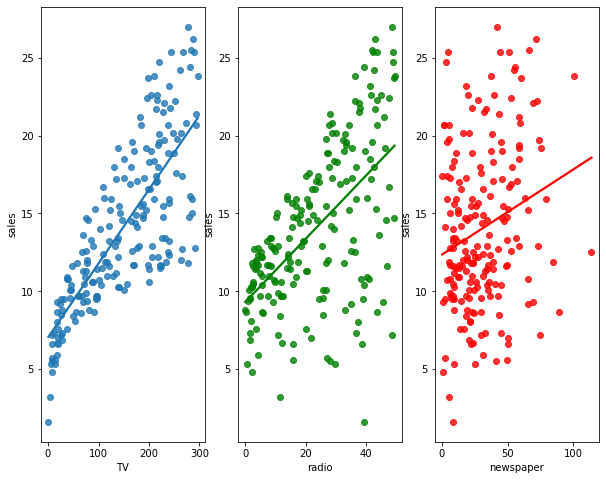

In [36]:
#get a scatter plot of advertising budget in TV, radio, and newspaper vs sales, respectively.
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(10, 8))
sns.regplot(ax=axes[0], x = advertise_df.TV, y = advertise_df.sales, ci = None)
sns.regplot(ax=axes[1], x = advertise_df.radio, y = advertise_df.sales, ci = None, color = 'green')
sns.regplot(ax=axes[2], x = advertise_df.newspaper, y = advertise_df.sales, ci = None, color = 'red');

The plot displays **sales, in thousands of units**, as a function of **TV**, radio, and newspaper budgets, **in thousands of dollars**, for 200 different markets. There exists a pretyy strong linear relationship between advertising budget in TV and sales. The lineartiy in other variables can be achieved via transformation etc.

Since there exists approximately a linear relationthip between the TV and sales, let's build a simple linear through regressing sales (Y) on TV advertising (X) as follows:

$$sales_i = \beta_0 +  \beta_1 *TV_i + \epsilon_i \quad$$ for $i=1,2,\ldots,200$, where $\epsilon_i \sim N(0,\sigma^2)$.


In [37]:
# get predictor and response
X = advertise_df.TV
Y = advertise_df.sales

# Add the intercept to the design matrix
X = sm.add_constant(X) 

#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html#statsmodels.regression.linear_model.OLS.fit
#Describe model
model = sm.OLS(Y, X) 
#Fit model and return results object
results = model.fit() 
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults
#Based on the results, get predictions
predictions = results.predict(X) 
#Get the results summary
print_model = results.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        20:57:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

# Interpretation of the output

- The fitted regression line is:

  $$\hat{sales}_i=7.0326 + (0.0475*TV_i).$$
  
- Interpretation of coefficients:
  - $TV = \hat{\beta}_1=0.0475$ tells us that an additional $\$ 1,000$ thousand spent on TV advertising is associated with selling approximately 47.5 additional units of the product.
  - The estimated stadandard error of $\hat{\beta}_1$, $se(\hat{\beta}_1)=0.003$. 
  - $cnst:\hat{\beta}_0=7.0326$ tells us that when even no budget is spent on TV advertising, 7 units of the product are expected to be sold.
  - The estimated stadandard error of $\hat{\beta}_0$, $se(\hat{\beta}_0)=0.458$.
  - Notice that the coefficients for $\hat{\beta}_0$ and $\hat{\beta}_1$ are very large relative to their standard errors.

- Hypothesis testing for slope parameter:

  $H_{0}:\beta_1=0$ vs
  $H_{1}:\beta_1 \neq 0$
  
- Under $H_{0}$, the observed value of **test statistic** is $t_{0}=\frac{0.0475}{0.003}=17.668$.
- The corresponding P-value is 0.000. Since P-value is less than $\alpha=0.05$, we reject $H_{0}$ 
at $\alpha=0.05$ level. We conclude that advertisement expenditure spent on TV media is linearly associated with the number of units sold for that product.

- Hypothesis testing for intercept parameter:

  $H_{0}:\beta_0=0$ vs
  $H_{1}:\beta_0 \neq 0$
  
- Under $H_{0}$, the observed value of **test statistic** is $t_{0}=\frac{7.0326}{0.458}=15.360$.
- The corresponding P-value is 0.000. Since P-value is less than $\alpha=0.05$, we reject $H_{0}$ 
at $\alpha=0.05$ level. We conclude that the intercept should be in the model.
     
- Confidence interval:

  - A $95\%$ confidence interval for $\beta_1$ is $[0.042,0.053]$. We are $95\%$ confident that true value
  of $\beta_1$ is between 0.042 and 0.053. For each $\$ 1,000$ increase in television advertising, there will be an average increase in sales of between 42 and 53 units.
  - A $95\%$ confidence interval for $\beta_0$ is $[6.130,7.935]$. We are $95\%$ confident that true value
  of $\beta_1$ is between 6.130 and 7.935. We can conclude that in the absence of any advertising, sales will, on average, fall somewhere betwen 6.130 and 7.935 units.

In [38]:
rse = np.sqrt(sum((predictions-Y)**2)/(len(Y)-2))
print(rse.round(4))

3.2587


- RSE = 3.2587 tells us that any prediction of sales on the basis of TV advertising would be off by about 3,2587 units. Whether or not
this prediction error is acceptable totally depends on the problem context.
- R-squared = 0.612 tells us that $61.2\%$ of variation in sales is accounted for by a linear relationship with the advertising budget spent on TV media.

## Reference

James, G., Witten, D., Hastie, T., and Tibshirani, R. (2021). [An Introduction to Statistical Learning: With Applications in R](https://www.statlearning.com/). New York: Springer.

In [39]:
import session_info
session_info.show()